# Sigma-transverse - Main plots of Pval weighting with runs 10000 to 72500 for different (modified) cuts  

In [1]:
import sys; sys.path.insert(0, '../')
from notebook_tools import *
%matplotlib inline

In [2]:
nominal_values=dict({'SigmaT_C12':0.167,'SigmaT_err_C12':0.006,
                     'a1_C12':0.143,'a1_err_C12':0.075,'a2_C12':0.158,'a2_err_C12':0.009,
                     'b1_C12':0.562,'b1_err_C12':0.078,'b2_C12':0.159,'b2_err_C12':0.009})

In [80]:
sims_nom=pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/sensitivity_studies/runs10000to72500_results.csv')
sims_mod_Xb125=pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/sensitivity_studies/runs10000to72500_Xb125_results.csv')
sims_mod_theta_pq_20=pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/sensitivity_studies/runs10000to72500_theta_pq_20_results.csv')
sims_mod_Mmiss1050=pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/sensitivity_studies/runs10000to72500_Mmiss1050_results.csv')

In [86]:
data_sets = [sims_nom,sims_mod_Xb125,sims_mod_theta_pq_20,sims_mod_Mmiss1050]
cut_names = ['nom' ,
             'mod_Xb125' ,
             'mod_theta_pq20',
             'mod_Mmiss1050' 
            ]

cut_labels= ['nominal cuts' , 
             '$x_B>1.25$' ,    
             '$\\theta_{pq}<20^{0}$',
             '$m_{miss} < 1.05$ GeV/c$^2$'
            ]
colors  = ['black','red','purple','green']
targets = ['12C','27Al','56Fe','208Pb']
target_names = ['$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb']


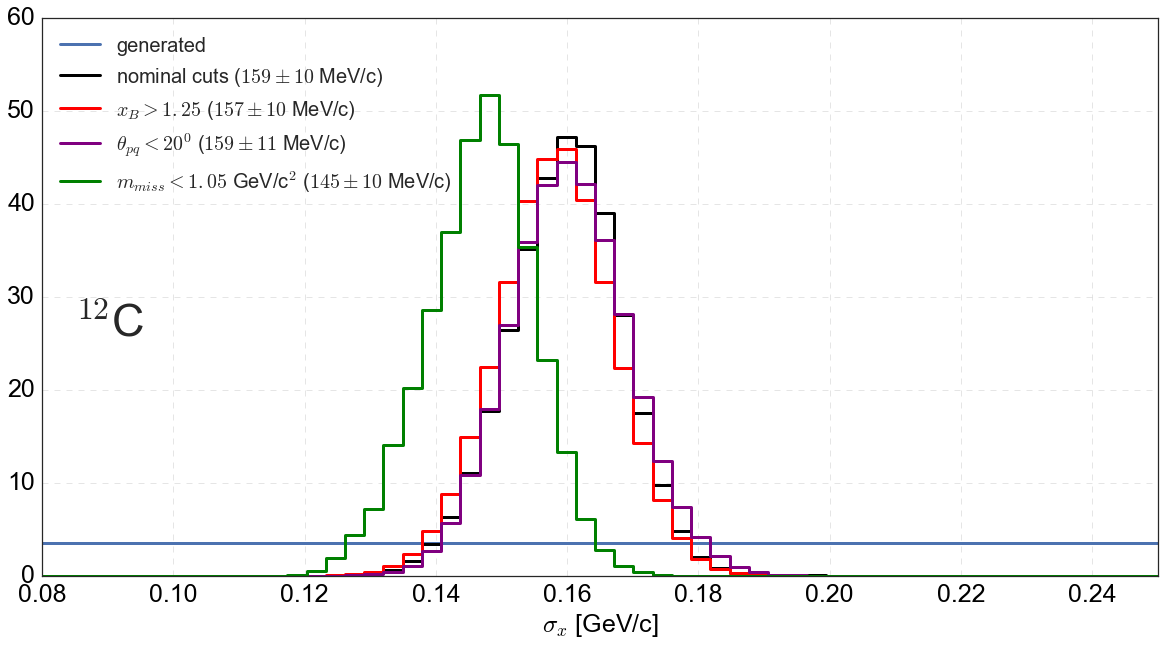

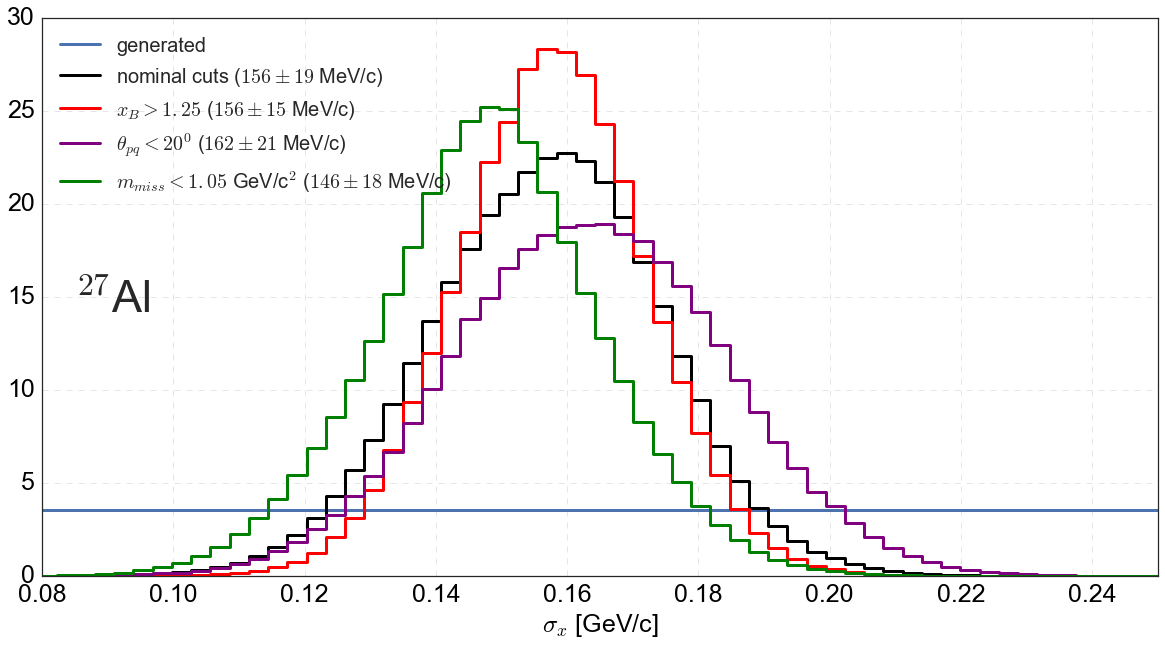

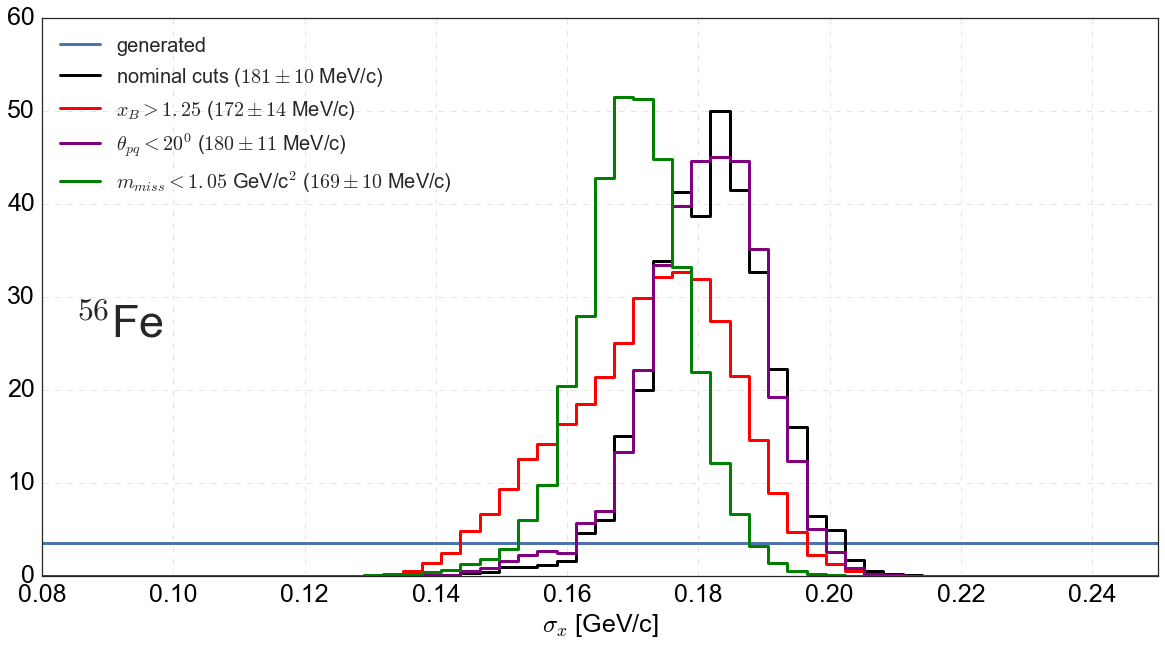

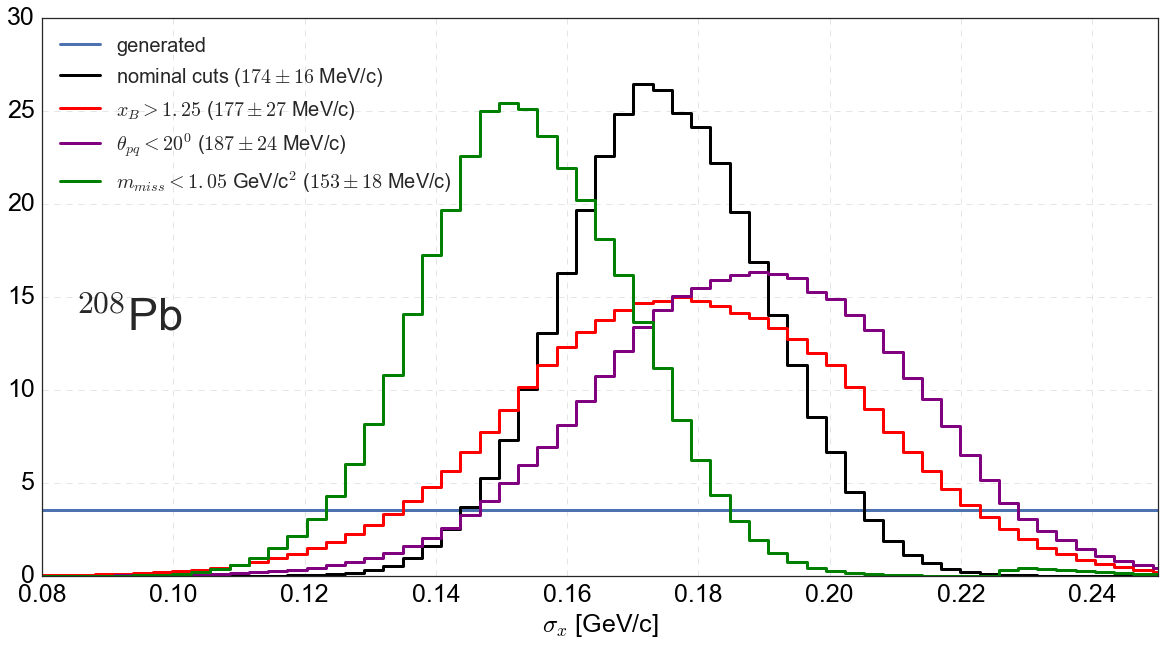

In [88]:
bins=np.linspace(0.05,0.34,100)
x_range=(0.08,0.25)
df_sigma_cm , df_sigma_cm_diff = pd.DataFrame() , pd.DataFrame()


for A,target,target_name in zip([12,27,56,208],targets,target_names):

    fig,ax = plt.subplots(figsize=(20,10))
    h,bins,_=plt.hist(sims_nom['genSigmaX'],bins=bins,normed=1, histtype='step', linewidth=0,color='blue');
    mid = 0.5*(bins[1:] + bins[:-1])+0.5*(bins[1] - bins[0])
    plt.plot( mid , h , linestyle='-', drawstyle='steps', linewidth=3 ,label='generated')
    
    h_max=0

    sigma_t , sigma_t_err = dict() , dict()
    for data,color,cut_label in zip(data_sets,colors,cut_labels):

        x = data['genSigmaX']
        weights = data['PvalTotal_unweighted_'+target]
        mean = np.average( x , weights=weights )
        variance = np.average( np.square(x-mean), weights=weights )
        sigma_t[cut_label] = np.sqrt( np.square(mean) - np.square(0.020) )
        sigma_t_err[cut_label] = np.sqrt( variance + np.square(0.005) )                                                                           
        label = cut_label + ' ($%.0f\pm %.0f$ MeV/c)'%(1000*sigma_t[cut_label],1000*sigma_t_err[cut_label])
        h,bins,_ = plt.hist(data['genSigmaX'],bins=bins,weights=weights,normed=1, histtype='step', linewidth=0);
        plt.plot( mid , h , linestyle='-', drawstyle='steps', linewidth=3 , color=color,label=label )
        if np.max(h)>h_max:
            h_max = np.max(h)

    plt.text(0.085,0.5*h_max,target_name,fontsize=45)
    ax.legend(fontsize=20,loc='upper left')
    set_axes(ax,x_label='$\\sigma_{x}$ [GeV/c]')
    ax.set_xlim(x_range)
    ax.grid(which='major',linestyle='--',alpha=0.5)

    
    df_sigma_cm_diff = df_sigma_cm_diff.append({'A':A,
                                                'sigma_t_nom':sigma_t['nominal cuts'],'sigma_t_nom_err':sigma_t_err['nominal cuts'],                                     
                                                'sigma_t_mod_Xb125':(sigma_t['$x_B>1.25$']-sigma_t['nominal cuts']),'sigma_t_mod_Xb125_err':np.sqrt(np.square(sigma_t_err['$x_B>1.25$']+np.square(sigma_t_err['nominal cuts']))),
                                                'sigma_t_mod_theta_pq20':(sigma_t['$\\theta_{pq}<20^{0}$']-sigma_t['nominal cuts']),'sigma_t_mod_theta_pq20_err':np.sqrt(np.square(sigma_t_err['$\\theta_{pq}<20^{0}$']+np.square(sigma_t_err['nominal cuts']))),
                                                'sigma_t_mod_Mmiss1050':(sigma_t['$m_{miss} < 1.05$ GeV/c$^2$']-sigma_t['nominal cuts']),'sigma_t_mod_Mmiss1050_err':np.sqrt(np.square(sigma_t_err['$m_{miss} < 1.05$ GeV/c$^2$']+np.square(sigma_t_err['nominal cuts']))),
                                               }, ignore_index=True)

    df_sigma_cm = df_sigma_cm.append({'A':A,                                                                            
                                      'sigma_t_nom':sigma_t['nominal cuts'],'sigma_t_nom_err':sigma_t_err['nominal cuts'],                                      
                                      'sigma_t_mod_Xb125':sigma_t['$x_B>1.25$'],'sigma_t_mod_Xb125_err':sigma_t_err['$x_B>1.25$'],                                      
                                      'sigma_t_mod_theta_pq20':sigma_t['$\\theta_{pq}<20^{0}$'],'sigma_t_mod_theta_pq20_err':sigma_t_err['$\\theta_{pq}<20^{0}$'],
                                      'sigma_t_mod_Mmiss1050':sigma_t['$m_{miss} < 1.05$ GeV/c$^2$'],'sigma_t_mod_Mmiss1050_err':sigma_t_err['$m_{miss} < 1.05$ GeV/c$^2$'],
                                     }, ignore_index=True)



In [96]:
# df_sigma_cm_diff['sigma_t_diff_average'] = 0
# df_sigma_cm_diff['sigma_t_diff_std'] = 0

df_sigma_cm_diff['sigma_t_diff_average'] = np.average([df_sigma_cm_diff.sigma_t_mod_Xb125,                                                      
                                                       df_sigma_cm_diff.sigma_t_mod_theta_pq20,    
                                                       df_sigma_cm_diff.sigma_t_mod_Mmiss1050,                                                       
                                                      ])

df_sigma_cm_diff['sigma_t_diff_std'] = np.std([df_sigma_cm_diff.sigma_t_mod_Xb125,                                                     
                                               df_sigma_cm_diff.sigma_t_mod_theta_pq20,                                                           
                                               df_sigma_cm_diff.sigma_t_mod_Mmiss1050
                                              ])
for i,row in df_sigma_cm_diff.iterrows(): 
    row['sigma_t_diff_average'] = np.average([row.sigma_t_mod_Xb125,
                                              row.sigma_t_mod_theta_pq20,
                                              row.sigma_t_mod_Mmiss1050
                                             ])
    row['sigma_t_diff_std'] = np.std([row.sigma_t_mod_Xb125,                                      
                                      row.sigma_t_mod_theta_pq20,                                      
                                      row.sigma_t_mod_Mmiss1050
                                      ])
df_sigma_cm_diff

,A,sigma_t_mod_Mmiss1050,sigma_t_mod_Mmiss1050_err,sigma_t_mod_Xb125,sigma_t_mod_Xb125_err,sigma_t_mod_theta_pq20,sigma_t_mod_theta_pq20_err,sigma_t_nom,sigma_t_nom_err,sigma_t_diff_average,sigma_t_diff_std
0,12.0,-0.013288,0.009862,-0.001519,0.010426,0.000653,0.010624,0.158572,0.010133,-0.004718,0.006124
1,27.0,-0.009260,0.018526,0.000741,0.015836,0.006569,0.021786,0.155667,0.018604,-0.000650,0.006537
2,56.0,-0.011784,0.009936,-0.009611,0.013849,-0.000941,0.010719,0.181254,0.010448,-0.007446,0.004684
3,208.0,-0.021372,0.018487,0.003086,0.026988,0.012985,0.024702,0.174312,0.016108,-0.001767,0.014440


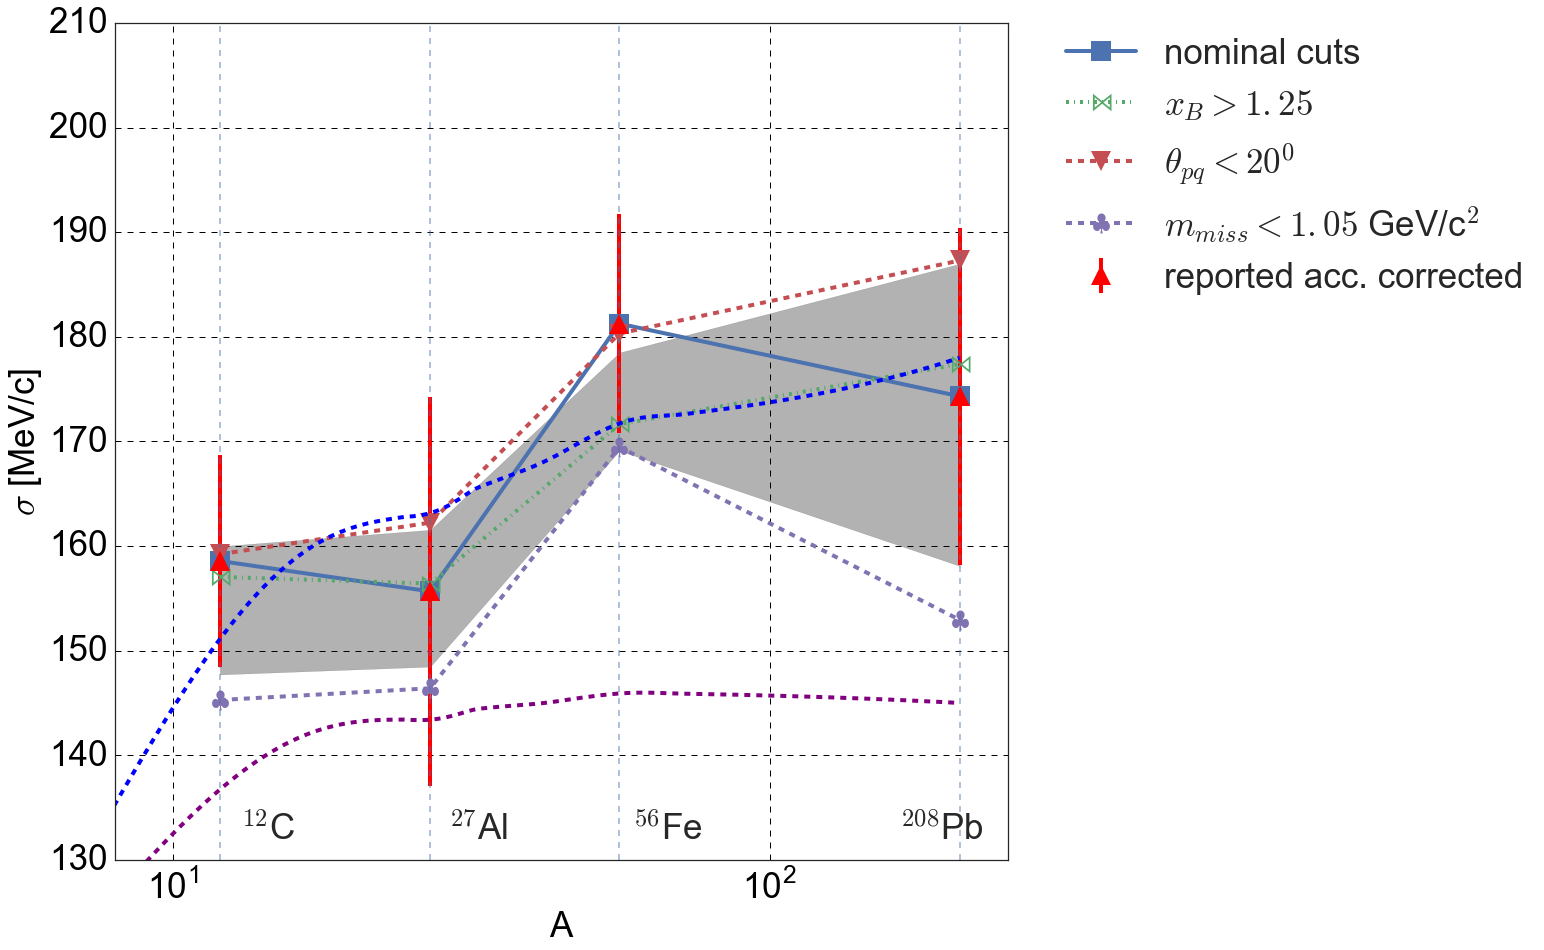

In [99]:
linestyles = ['-', '-.', '--', '--', ':','--', '-.', '--', ':']
markers = []
for m in Line2D.markers:
    try:
        if len(m) == 1 and m != ' ':
            markers.append(m)
    except TypeError:
        pass
styles = markers + ['s',r'$\bowtie$', 'v', r'$\clubsuit$','^','v', r'$\bowtie$','s',]

s=30
fig, ax = plt.subplots(figsize=(16,15))

axisNum = 0
for cut_name,cut_label,ls in zip(cut_names,cut_labels ,linestyles):
    axisNum += 1
    style = styles[(axisNum - len(linestyles)) % len(styles)]
    ax.plot(df_sigma_cm.A, 1000*df_sigma_cm['sigma_t_'+cut_name],lw=4,linestyle=ls, marker=style,markersize=20, label=cut_label)

# a band of systematics from the average and standard deviation of the difference from the nominal
avg_band = 1000*(df_sigma_cm.sigma_t_nom + df_sigma_cm_diff.sigma_t_diff_average)
min_band = avg_band - 1000*df_sigma_cm_diff.sigma_t_diff_std
max_band = avg_band + 1000*df_sigma_cm_diff.sigma_t_diff_std
plt.fill_between( df_sigma_cm_diff.A , min_band , max_band , color='black' , alpha=0.3)


pt.set_axes(ax , 'A' , '$\sigma$ [MeV/c]' , fontsize=35)
ax.grid(b=True, which='major', color='black', linestyle='--')
plt.plot([12,12],[130,210],'b--',alpha=0.5)
plt.plot([27,27],[130,210],'b--',alpha=0.5)
plt.plot([56,56],[130,210],'b--',alpha=0.5)
plt.plot([208,208],[130,210],'b--',alpha=0.5)

ax.set_xlim(8,250)
ax.set_ylim(130,210)
ax.set_xscale('log')
ax.text(13,132,'$^{12}$C',fontsize=35)
ax.text(29,132,'$^{27}$Al',fontsize=35)
ax.text(59,132,'$^{56}$Fe',fontsize=35)
ax.text(165,132,'$^{208}$Pb',fontsize=35)

ColleCalc = pd.DataFrame({'A':[4,12 , 27 , 56 , 208],
                        'allpairs':[110,140,144,146,145],
                        'nl00':[110,156,164,172,178]},
                         index = ['$^{4}$He','$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb'])
plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' , vary='allpairs',color='purple' )#,label='Colle et al., All pairs')
plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' , vary='nl00')#,label='Colle et al., $^1S_0$ pairs')


plot_data( data=df_sigma_cm , vary='sigma_t_nom', varyerr='sigma_t_nom_err' , mulfac=1000 , label='reported acc. corrected'  )


ax.legend(fontsize=35,bbox_to_anchor=(1.05, 1), borderaxespad=0.,loc=2)

plt.savefig('/Users/erezcohen/Desktop/DataMining/AccCorr_ppSRCAnalysisNote/all_figures/cm_sensitivity/sigma_cm_sensitivity_bands_AccCorrected.pdf', dpi=300, bbox_inches='tight')